### 6610450871 นายชนพัฒน์ โชติกุลรัตน์ หมู่ 200

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [313]:
df = pd.read_excel("IndiaWeather.xlsx")

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   อุณหภูมิ            500 non-null    object 
 1   ความชื้น            500 non-null    object 
 2   ปริมาณ PM2.5        500 non-null    object 
 3   ปริมาณ PM10         500 non-null    object 
 4   ปริมาณไนโตรเจน      500 non-null    object 
 5   ปริมาณซัลเฟอร์      500 non-null    object 
 6   ปริมาณคาร์บอน       500 non-null    object 
 7   ระยะห่างจากโรงงาน   500 non-null    float64
 8   ความหนาแน่นประชากร  500 non-null    int64  
 9   คุณภาพอากาศ         500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [315]:
df['คุณภาพอากาศ'].value_counts()

คุณภาพอากาศ
ดี                  195
ปานกลาง             157
แย่                  99
อันตรายต่อสุขภาพ     49
Name: count, dtype: int64

In [316]:
df.replace('?', np.nan, inplace=True)
for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(float)
        for label in df['คุณภาพอากาศ'].unique():
            df.loc[(df['คุณภาพอากาศ'] == label) & (df[col].isna()), col] = df[col].loc[df['คุณภาพอากาศ'] == label].mean()

C:\Users\chona\AppData\Local\Temp\ipykernel_18984\3874330835.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [317]:
pm25_bins = [0, 38, 51, 91, np.inf]
pm25_labels = ['ดี', 'ปานกลาง', 'แย่', 'อันตรายต่อสุขภาพ']
pm25_filtered = pd.cut(df['ปริมาณ PM2.5'], bins=pm25_bins, labels=pm25_labels, right=False)
df = df[pm25_filtered == df['คุณภาพอากาศ']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 1 to 496
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   อุณหภูมิ            177 non-null    float64
 1   ความชื้น            177 non-null    float64
 2   ปริมาณ PM2.5        177 non-null    float64
 3   ปริมาณ PM10         177 non-null    float64
 4   ปริมาณไนโตรเจน      177 non-null    float64
 5   ปริมาณซัลเฟอร์      177 non-null    float64
 6   ปริมาณคาร์บอน       177 non-null    float64
 7   ระยะห่างจากโรงงาน   177 non-null    float64
 8   ความหนาแน่นประชากร  177 non-null    float64
 9   คุณภาพอากาศ         177 non-null    object 
dtypes: float64(9), object(1)
memory usage: 15.2+ KB


In [318]:
df['คุณภาพอากาศ'].value_counts()

คุณภาพอากาศ
ดี                  146
ปานกลาง              14
แย่                  14
อันตรายต่อสุขภาพ      3
Name: count, dtype: int64

In [319]:
MOLAR_VOLUME = 24.45
MW_NO2 = 46.01  
MW_SO2 = 64.07  
MW_CO = 28.01  

In [320]:
def ppb_to_ugm3(ppb, molecular_weight):
    ugm3 = (ppb * molecular_weight * 1e-3) / MOLAR_VOLUME 
    return ugm3

def ppm_to_ugm3(ppm, molecular_weight):
     ugm3 = (ppm * molecular_weight) / MOLAR_VOLUME
     return ugm3

In [321]:
df['ปริมาณไนโตรเจน'] = ppm_to_ugm3(df['ปริมาณไนโตรเจน'], MW_NO2)
df['ปริมาณซัลเฟอร์'] = ppm_to_ugm3(df['ปริมาณซัลเฟอร์'], MW_SO2)
df['ปริมาณคาร์บอน'] = ppm_to_ugm3(df['ปริมาณคาร์บอน'], MW_CO)


In [322]:
le = LabelEncoder()
df['คุณภาพอากาศ'] = le.fit_transform(df['คุณภาพอากาศ'])

In [323]:
X = df.drop('คุณภาพอากาศ', axis=1)
y = df['คุณภาพอากาศ']

In [324]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [326]:
clf = DecisionTreeClassifier(random_state=1)

In [327]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [328]:
y_pred = clf.predict(X_test)

In [329]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.draw()
c:\Users\chona\anacon

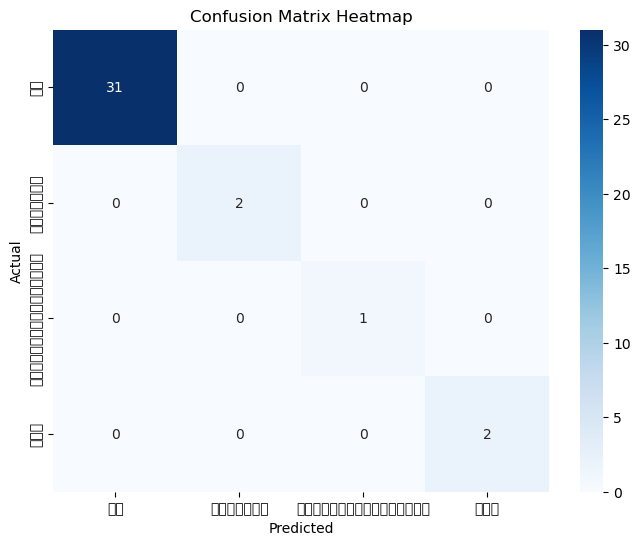

In [330]:
cm = confusion_matrix(y_test, y_pred)
class_labels = le.classes_ 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

c:\Users\chona\anaconda3\Lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\chona\anaconda3\Lib\site-p

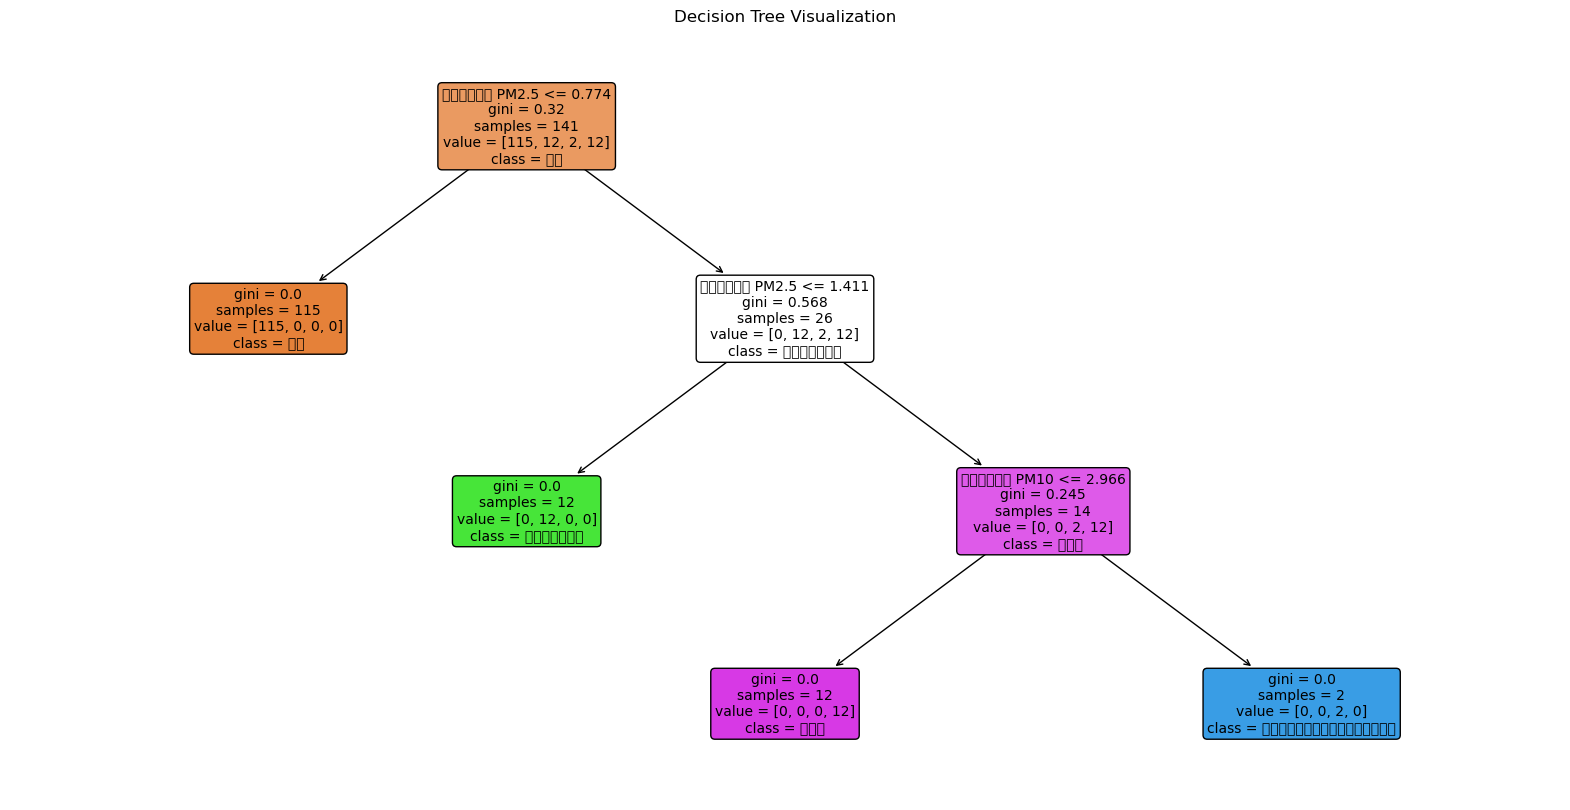

In [331]:
plt.figure(figsize=(20, 10)) 
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=le.classes_,  
          feature_names=df_filtered.columns[:-2].tolist(),
          fontsize=10) 
plt.title("Decision Tree Visualization")
plt.show()